In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
colors = sns.color_palette("tab10")

from scipy.optimize import curve_fit

In [2]:
Ls = 2**np.arange(4, 10)
shots = 256
timesteps = 128
p_dict = {
    1: 0.16,
    2: 0.33,
    3: 0.418,
    4: 0.458,
    5: 0.478
}
D = 1
p = p_dict[D]

In [3]:
# Load data. Rows are x, y_mu, y_std
data_list = [np.zeros((3, int(L / 2))) for L in Ls]
logxdata = np.array([])
ydata = np.array([])
stddata = np.array([])
for i, L in enumerate(Ls):
    depth = int(L / 2)
    try:
        filename = "data/{}_{}_{}_{}_{}_entropies_all.npy".format(L, depth, shots * timesteps, p, D)
        data_list[i] = np.load(filename)[:, 1::2]
        if i > 3:
            logxdata = np.append(logxdata, np.log(data_list[i][0, :]))
            ydata = np.append(ydata, data_list[i][1, :])
            stddata = np.append(stddata, data_list[i][2, :])
    except:
        print("No data for L = {}".format(L))

In [4]:
def S(xilog, h, c):
    return -h * xilog + c
fit_result = curve_fit(S, logxdata, ydata, p0 = [0.53, 1], sigma = stddata)
h = fit_result[0][0]
c = fit_result[0][1]

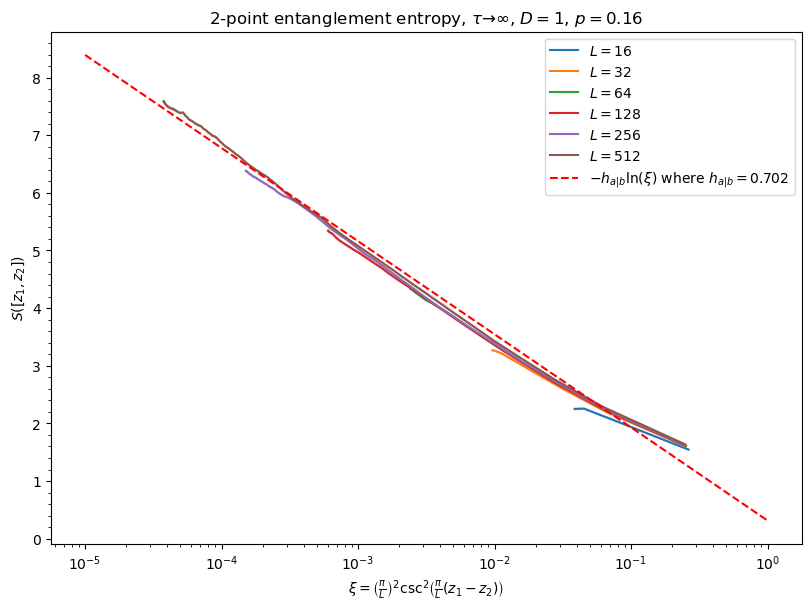

In [5]:
plt.subplots(figsize = (8, 6), layout = "constrained")

for i, L in enumerate(Ls):
    stub = "figs/{}_{}_{}_".format(shots * timesteps, p, D)
    data = data_list[i]
    x = data[0, :]
    mu = data[1, :]
    std = data[2, :]
    plt.plot(x, mu, label = "$L={}$".format(L), color = colors[i])
    plt.fill_between(x, mu - std, mu + std, color = colors[i], alpha = 0.3)

xis = np.logspace(-5, 0, 1000)
Sxis = -h * np.log(xis) + c
plt.plot(xis, Sxis, linestyle = "--", color = "red", label = "$-h_{{a|b}}\ln(\\xi)$ where $h_{{a|b}}={:.3f}$".format(h))

plt.xlabel(r"$\xi=\left(\frac{\pi}{L}\right)^2\csc^2\left(\frac{\pi}{L}(z_1-z_2)\right)$")
plt.ylabel(r"$S([z_1,z_2])$")
plt.title("2-point entanglement entropy, $\\tau\\to\infty$, $D={}$, $p={}$".format(D, p))
plt.legend(loc = "upper right")
plt.xscale('log')
plt.minorticks_on()
plt.savefig(stub + "entropies.png")